**Meteorite Landings Dataset (Recorded by The Meteorical Society and Provided by NASA)¶**

**Metadata**

- name: the name of the meteorite

- id: a unique identifier for the meteorite

- nametype: one of: -- valid: a typical meteorite -- relict: a meteorite that has been highly degraded by weather on Earth
- recclass: the class of the meteorite (see the Wikipedia article on meteorite classification)
- mass: the mass of the meteorite, in grams
- fall: whether the meteorite was seen falling, or was discovered after its impact; one of: -- Fell: the meteorite's fall was observed -- Found: the meteorite's fall was not observed
- year: the year the meteorite fell, or the year it was found (Any year before 860 CE or 2016 are in BCE)
- reclat: the latitude of the meteorite's landing
- reclong: the longitude of the meteorite's landing
- GeoLocation: a parentheses-enclose, comma-separated tuple that combines reclat and reclong

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

**Reading the data and saving it to a dataframe**

In [2]:
data = pd.read_csv('meteorite-landings.csv')

In [3]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [4]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


**Converting year column from float data type to integer data type**

In [5]:
data['year'].dtype

dtype('float64')

In [6]:
data['year'] = data['year'].astype(pd.Int64Dtype())

In [7]:
data['year'].dtype

Int64Dtype()

**Sorting the data**

In [8]:
#Sorting dataset on basis of year in ascending order
data.sort_values(by=['year'],inplace=True)

In [9]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,16914,Valid,Stone-uncl,NaN,Fell,920,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)"
...,...,...,...,...,...,...,...,...,...,...
38128,Um-Hadid,24114,Valid,Mesosiderite,15400.0,Found,<NA>,21.69500,50.59667,"(21.695000, 50.596670)"
38201,Valencia,24147,Valid,H5,33500.0,Found,<NA>,39.00000,-0.03333,"(39.000000, -0.033330)"
38224,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,<NA>,-39.10000,-67.06667,"(-39.100000, -67.066670)"
38328,Wiltshire,56143,Valid,H5,92750.0,Found,<NA>,51.14967,-1.81000,"(51.149670, -1.810000)"


**Checking abnormality specific to the Dataset**

In [10]:
#This dataset has data till 2016
data[data['year']>2016]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,0.0,0.00000,"(0.000000, 0.000000)"
38188,Ur,24125,Valid,Iron,NaN,Found,2501,30.9,46.01667,"(30.900000, 46.016670)"


**Dataset has rows which are >2016 but it is in BCE (Before Common Era), though it is not correct still it is abnormailty in our dataset**

In [11]:
data.drop(data[data['year']>2016].index, inplace=True)

In [12]:
#Assuring
data[data['year']>2016]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation


**Checking for Null Values**

In [13]:
data.isnull()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,False,False,False,False,True,False,False,False,False,False
38301,False,False,False,False,False,False,False,False,False,False
703,False,False,False,False,False,False,False,False,False,False
678,False,False,False,False,True,False,False,False,False,False
278,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
38128,False,False,False,False,False,False,True,False,False,False
38201,False,False,False,False,False,False,True,False,False,False
38224,False,False,False,False,False,False,True,False,False,False
38328,False,False,False,False,False,False,True,False,False,False


In [14]:
data.isnull().any()

name           False
id             False
nametype       False
recclass       False
mass            True
fall           False
year            True
reclat          True
reclong         True
GeoLocation     True
dtype: bool

**Counting Null Values in each column**

In [15]:
#Count of null values
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            130
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

**Removing Null values from the Dataset**

In [16]:
#Dataset count row-wise for each column before removing null values
data.count()

name           45714
id             45714
nametype       45714
recclass       45714
mass           45584
fall           45714
year           45426
reclat         38399
reclong        38399
GeoLocation    38399
dtype: int64

In [17]:
#Dropping null values from the Dataset
data.dropna(inplace=True)

In [18]:
#Count of null values after dropping null values
data.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [19]:
#Dataset count row-wise for each column after removing null values
data.count()

name           38115
id             38115
nametype       38115
recclass       38115
mass           38115
fall           38115
year           38115
reclat         38115
reclong        38115
GeoLocation    38115
dtype: int64

**Dropping rows where mass is zero**

In [20]:
#Counting rows where mass is zero before dropping
data[data['mass']==0].count()

name           19
id             19
nametype       19
recclass       19
mass           19
fall           19
year           19
reclat         19
reclong        19
GeoLocation    19
dtype: int64

In [21]:
#Dropping rows where mass is zero
data.drop(data[data['mass']==0].index, inplace=True)

In [22]:
#Counting rows where mass is zero after dropping
data[data['mass']==0].count()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

**Checking for GeoLocation Coordinates**

In [23]:
#Checking GeoLocations
print(data[data['GeoLocation']=='(0.000000, 0.000000)'].count())
data[data['GeoLocation']=='(0.000000, 0.000000)']

name           6184
id             6184
nametype       6184
recclass       6184
mass           6184
fall           6184
year           6184
reclat         6184
reclong        6184
GeoLocation    6184
dtype: int64


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
26374,New York,55760,Valid,"Iron, IIIAB",2950.00,Found,1965,0.0,0.0,"(0.000000, 0.000000)"
44893,Yamato 983064,39686,Valid,L6,40.94,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
44892,Yamato 983063,39685,Valid,LL3,3.38,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
44891,Yamato 983056,39678,Valid,H5,362.40,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
45095,Yamato 983366,39988,Valid,Eucrite-unbr,138.90,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
...,...,...,...,...,...,...,...,...,...,...
30773,Northwest Africa 7857,57422,Valid,LL6,246.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"
30774,Northwest Africa 7858,57423,Valid,H4,459.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"
30776,Northwest Africa 7861,57425,Valid,L5,611.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"
30777,Northwest Africa 7862,57426,Valid,L4/5,317.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"


**Dropping abnormal GeoLocations**


In [24]:
data.drop(data[data['GeoLocation']=='(0.000000, 0.000000)'].index, inplace=True)

In [25]:
#Assuring
print(data[data['GeoLocation']=='(0.000000, 0.000000)'].count())
data[data['GeoLocation']=='(0.000000, 0.000000)']

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation


**Reset Index after removing Null values, Zero Mass Rows, Invalid GeoLocations**

In [26]:
#Displaying index of Dataset before reindexing
data.index

Int64Index([38301,   703,   278,   852,   283,  5329,   174, 26166,   410,
              956,
            ...
              965,  3403,  5371,    86, 17387, 17386, 37733, 36403, 30514,
              194],
           dtype='int64', length=31912)

In [27]:
#Reset index of Dataset
data.reset_index(inplace=True)

In [28]:
#Displaying index of Dataset after reindexing
data.index

RangeIndex(start=0, stop=31912, step=1)

In [29]:
#Deleting previous index row
del data['index']

In [30]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)"
1,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)"
2,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)"
3,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.483330, 9.516670)"
4,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.866670, 7.350000)"
...,...,...,...,...,...,...,...,...,...,...
31907,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012,32.80600,9.83300,"(32.806000, 9.833000)"
31908,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012,36.23500,-116.18358,"(36.235000, -116.183580)"
31909,Rosamond,57434,Valid,LL3,11.1,Found,2012,34.82793,-118.14640,"(34.827930, -118.146400)"
31910,Northwest Africa 7496,56314,Valid,Eucrite-pmict,788.4,Found,2012,22.94781,-13.38527,"(22.947810, -13.385270)"


**Getting the Mean, Median, Mode, Std. Deviation of Mass**

In [31]:
#Mean
data['mass'].mean()

18552.775309444856

In [32]:
#Median
data['mass'].median()

29.685000000000002

In [33]:
#Mode
data['mass'].mode()

0    1.3
dtype: float64

In [34]:
#Standard Deviation
data['mass'].std()

687032.3021663561

**Finding the Correlation, Covariance**

In [35]:
#Correaltion between mass and year
data['mass'].corr(data['year'].astype('float'))

-0.11906321369202685

In [36]:
#Covariance between mass and year
data['mass'].cov(data['year'].astype('float'))

-2276223.217698385

**Type of Meteorite** (Should not be confused with Classification)

In [37]:
data['nametype'].unique()

array(['Valid', 'Relict'], dtype=object)

In [38]:
#Counting based on types of Meteorites
data['nametype'].value_counts()

Valid     31909
Relict        3
Name: nametype, dtype: int64

**Visualizing the data**

Text(0.5, 1.0, 'Count of different type of Meteorites')

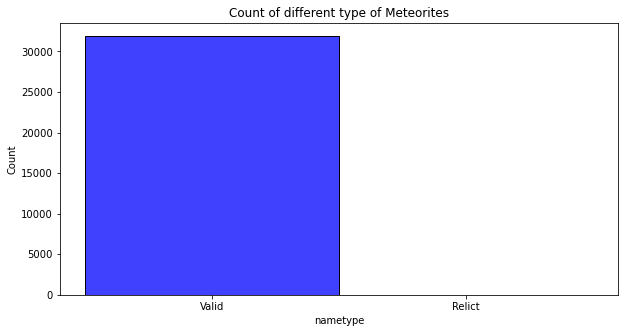

In [39]:
#Plotting Histogram Plot for 'Nametype' Column
fig = plt.figure(figsize=(10,5))
sns.histplot(data=data['nametype'],color='b').set_title('Count of different type of Meteorites')

([<matplotlib.patches.Wedge at 0x1e0832d5a30>,
 [Text(-1.0999999520392434, 0.0003248286662686357, 'Valid'),
  Text(1.0999999520514863, -0.00032478720397173923, 'Relict')],
 [Text(-0.5999999738395873, 0.0001771792725101649, '99.99%'),
  Text(0.5999999738462652, -0.00017715665671185773, '0.01%')])

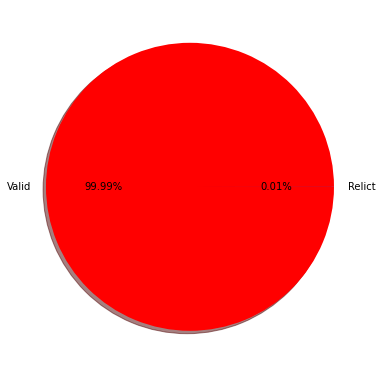

In [40]:
#Plotting Piechart for 'Nametype' Column
fig=plt.figure(figsize=(10,5))
ax=fig.add_axes([0,0,1,1])
ax.pie(data['nametype'].value_counts(),labels=data['nametype'].unique(),autopct='%0.2f%%',shadow=True,colors=['r','b'])

**Classification of Meteorites**

In [41]:
#Showing Unique Classes
data['recclass'].unique()

array(['Iron', 'L6', 'Iron, IID', 'Stone-uncl', 'LL6', 'Iron, IAB-MG',
       'Iron, IIIAB', 'L', 'H6', 'H', 'Iron, IIAB', 'L5', 'Iron, IVA-an',
       'Pallasite, PMG-an', 'H5', 'H3-5', 'L/LL4', 'H4', 'Iron, IAB-sLL',
       'Iron, IAB?', 'Iron, IC', 'Iron, ungrouped', 'Iron, IVB', 'LL5',
       'LL4', 'Howardite', 'Iron, IAB complex', 'H5-7', 'CI1',
       'Eucrite-mmict', 'Pallasite, PMG', 'OC', 'Martian (chassignite)',
       'H?', 'L4', 'Iron, IIIE', 'Eucrite-pmict', 'CR2', 'Iron, IVA',
       'Pallasite', 'Iron, IAB-ung', 'Aubrite', 'H4/5', 'CM2', 'LL7',
       'Mesosiderite-A1', 'Diogenite', 'Iron, IIE-an', 'Pallasite?',
       'Iron, IIC', 'H3/4', 'L3.7', 'Iron, IAB-sLH', 'Iron, IIIAB?',
       'H/L3.9', 'Iron, IIIF', 'Mesosiderite-A4', 'Mesosiderite-B4',
       'CV3', 'LL3.6', 'Iron, IIG', 'Iron, IAB-sHL', 'EL6',
       'Martian (shergottite)', 'L/LL5', 'Lodranite', 'Ureilite', 'CO3.4',
       'Angrite', 'L/LL6', 'CO3.5', 'Eucrite-cm', 'Iron, IIE', 'CO3.7',
       'H/L3.6', 'M

In [42]:
#No. of Meteorites for each Unique Class
data['recclass'].value_counts()

L6                   6523
H5                   5586
H4                   3324
H6                   3231
L5                   2723
                     ... 
L5-7                    1
Eucrite-an              1
Diogenite-olivine       1
Mesosiderite?           1
H3.7-6                  1
Name: recclass, Length: 390, dtype: int64

In [43]:
#Sample Data from Original Class Data
sample_recclass = data.loc[:100,'recclass']
sample_recclass.value_counts()

L6                       19
Stone-uncl               10
H6                        9
H5                        9
Iron, IIIAB               5
H4                        4
Iron, ungrouped           4
Eucrite-mmict             3
L5                        3
L                         3
Iron                      2
Iron, IID                 2
Iron, IVA-an              2
Howardite                 2
LL6                       2
Iron, IC                  2
Iron, IAB-sLL             1
Pallasite, PMG            1
Iron, IIAB                1
Pallasite, PMG-an         1
LL5                       1
H3-5                      1
Iron, IAB?                1
Iron, IAB-MG              1
Iron, IAB complex         1
H5-7                      1
L/LL4                     1
LL4                       1
H?                        1
L4                        1
CI1                       1
Iron, IVB                 1
Martian (chassignite)     1
H                         1
OC                        1
Iron, IIIE          

**Plotting of Sample Classification Data of Meteorites**

<ipython-input-44-e5227b8babcf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax.set_xticklabels(sample_recclass.value_counts().index,rotation=90)


Text(0, 0.5, 'Counts')

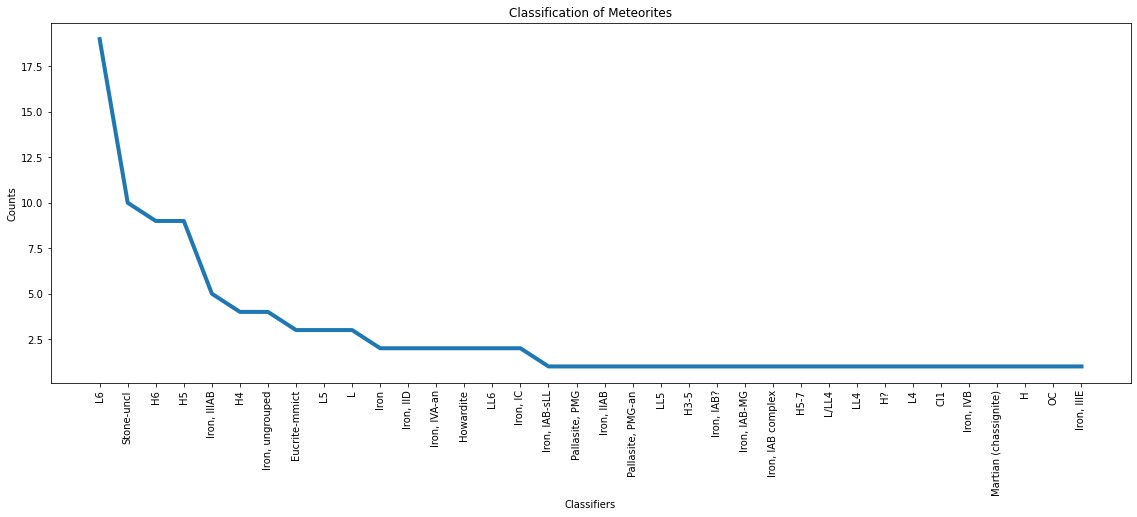

In [44]:
%matplotlib inline
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(sample_recclass.value_counts(),linewidth=4)
ax.set_title('Classification of Meteorites')
labels = ax.set_xticklabels(sample_recclass.value_counts().index,rotation=90)
ax.set_xlabel('Classifiers')
ax.set_ylabel('Counts')

- How many Meteorites Fall was observed (fell) and not observed (found)?

In [45]:
#Count based on Fell and Found
data['fall'].value_counts()

Found    30848
Fell      1064
Name: fall, dtype: int64

Text(0.5, 1.0, 'Count of Meteorid Fell Vs Found')

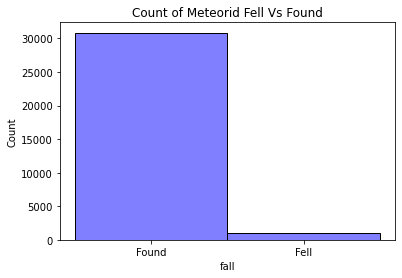

In [46]:
#Plotting Histogram on the Categorical data of Column 'fall'
sns.histplot(data=data['fall'],color='b',alpha=0.5).set_title('Count of Meteorid Fell Vs Found')

([<matplotlib.patches.Wedge at 0x1e0833e09a0>,
 [Text(-1.0939710601874346, 0.11501008422038683, 'Found'),
  Text(1.0939710548034227, -0.11501013543286864, 'Fell')],
 [Text(-0.5967114873749643, 0.06273277321112009, '96.67%'),
  Text(0.5967114844382305, -0.06273280114520106, '3.33%')])

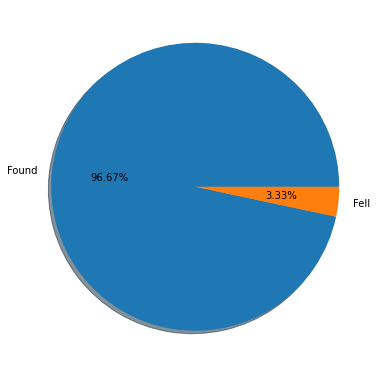

In [47]:
#Plotting Piechart on the data of Column 'fall'
fig=plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
ax.pie(data['fall'].value_counts(),labels=data['fall'].unique(),autopct='%0.2f%%',shadow=True)

**Finding Oldest and Latest Meteorite (fell or found)**

In [48]:
#Latest Meteorite Fell or Found
data[data['year']==data['year'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31911,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013,54.81667,61.11667,"(54.816670, 61.116670)"


In [49]:
#Latest Meteorite Fell (Fall Observed)
data[(data['year']==data['year'].max()) & (data['fall']=='Fell')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31911,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013,54.81667,61.11667,"(54.816670, 61.116670)"


In [50]:
#Latest Meteorite Found (Fall not Observed)
found = data[data['fall']=='Found']
data[(data['year']==found['year'].max()) & (data['fall']=='Found')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31897,Jiddat al Harasis 799,57428,Valid,LL6,212.0,Found,2012,19.77278,56.38982,"(19.772780, 56.389820)"
31898,Johannesburg,55765,Valid,H4,63.0,Found,2012,35.37788,-117.63728,"(35.377880, -117.637280)"
31899,Los Vientos 028,57338,Valid,H~5,12110.0,Found,2012,-24.68333,-69.76667,"(-24.683330, -69.766670)"
31900,Tupelo,56551,Valid,EL6,280.0,Found,2012,34.24216,-88.77594,"(34.242160, -88.775940)"
31901,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012,40.89201,-118.55319,"(40.892010, -118.553190)"
31903,Antelope,57455,Valid,H4,754.0,Found,2012,40.90183,-118.54465,"(40.901830, -118.544650)"
31904,Catalina 009,57173,Valid,CR2,5.2,Found,2012,-25.23333,-69.71667,"(-25.233330, -69.716670)"
31906,Ksar Ghilane 011,55606,Valid,L4,25.6,Found,2012,32.89100,9.91300,"(32.891000, 9.913000)"
31907,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012,32.80600,9.83300,"(32.806000, 9.833000)"
31908,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012,36.23500,-116.18358,"(36.235000, -116.183580)"


In [51]:
#Oldest Meteorite Fell or Found
data[data['year']==data['year'].min()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.7,"(49.416670, 21.700000)"


In [52]:
#Oldest Meteorite Fell (Fall Observed)
fell = data[data['fall']=='Fell']
data[data['year'] == fell['year'].min()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
1,Nogata,16988,Valid,L6,472.0,Fell,860,33.725,130.75,"(33.725000, 130.750000)"


In [53]:
#Oldest Meteorite Found (Fall not Observed)
data[(data['year']==data['year'].min()) & (data['fall']=='Found')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.7,"(49.416670, 21.700000)"


In [54]:
#Latest Meteorite Group by fell and found
fell_found = data.groupby('fall')
fell_found['year'].max()

fall
Fell     2013
Found    2012
Name: year, dtype: Int64

In [55]:
#Oldest Meteorite Group by fell and found
fell_found['year'].min()

fall
Fell     860
Found    601
Name: year, dtype: Int64

**Heaviest and Lightest Meteorite Fell or Found**

In [56]:
#Heaviest Meteorite group by Fell and Found
fell_found['mass'].max()

fall
Fell     23000000.0
Found    60000000.0
Name: mass, dtype: float64

In [57]:
#Lightest Meteorite group by Fell and Found
fell_found['mass'].min()

fall
Fell     0.10
Found    0.01
Name: mass, dtype: float64

In [58]:
#Heaviest Meteorite fell or found
data[data['mass']==data['mass'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
995,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,-19.58333,17.91667,"(-19.583330, 17.916670)"


In [59]:
#Heaviest Meteorite Fell (Fall Observed)
data[data['mass'] == fell['mass'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
1581,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947,46.16,134.65333,"(46.160000, 134.653330)"


In [60]:
#Heaviest Meteorite Found (Fall not Observed)
data[(data['mass']==data['mass'].max()) & (data['fall']=='Found')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
995,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,-19.58333,17.91667,"(-19.583330, 17.916670)"


In [61]:
#Lightest Meteorite fell or found
data[data['mass']==data['mass'].min()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
8363,Yamato 8333,29438,Valid,H5,0.01,Found,1983,-71.5,35.66667,"(-71.500000, 35.666670)"


In [62]:
#Lightest Meteorite Fell (Fall Observed)
data[data['mass'] == fell['mass'].min()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
1122,Yoshiki,30372,Valid,Stone-uncl,0.1,Fell,1928,34.16667,131.45000,"(34.166670, 131.450000)"
2064,Vilna,24183,Valid,L5,0.1,Fell,1967,54.22500,-111.69167,"(54.225000, -111.691670)"
8325,Allan Hills 83026,546,Valid,CO3,0.1,Found,1983,-76.82234,158.21493,"(-76.822340, 158.214930)"
10889,Lewis Cliff 87056,13530,Valid,Aubrite,0.1,Found,1987,-84.34532,161.47809,"(-84.345320, 161.478090)"
16084,Pecora Escarpment 91357,18648,Valid,L6,0.1,Found,1991,-85.67623,-69.08566,"(-85.676230, -69.085660)"
19787,Queen Alexandra Range 971018,20526,Valid,LL5,0.1,Found,1997,-84.00000,168.00000,"(-84.000000, 168.000000)"
22655,Queen Alexandra Range 99064,21516,Valid,L5,0.1,Found,1999,-84.00000,168.00000,"(-84.000000, 168.000000)"
22656,Queen Alexandra Range 99063,21515,Valid,LL5,0.1,Found,1999,-84.00000,168.00000,"(-84.000000, 168.000000)"
24889,Frontier Mountain 01156,10338,Valid,H3/4,0.1,Found,2001,-72.98944,160.40222,"(-72.989440, 160.402220)"
31084,Miller Butte 09001,55371,Valid,H5,0.1,Found,2009,-71.90355,160.48982,"(-71.903550, 160.489820)"


In [63]:
#Lightest Meteorite Found (Fall not Observed)
data[(data['mass']==data['mass'].min()) & (data['fall']=='Found')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
8363,Yamato 8333,29438,Valid,H5,0.01,Found,1983,-71.5,35.66667,"(-71.500000, 35.666670)"


**Finding Heaviest and Lightest Meteorites Year-wise**

In [64]:
#Heaviest Meteorites for each year
groupby_year = data.groupby('year')
groupby_year['mass'].max()

year
601         376.0
860         472.0
1399     107000.0
1490        103.3
1491     127000.0
          ...    
2009    1600000.0
2010     100000.0
2011      50000.0
2012      12110.0
2013     100000.0
Name: mass, Length: 253, dtype: float64

In [65]:
#Lightest Meteorites for each year
groupby_year['mass'].min()

year
601        376.00
860        472.00
1399    107000.00
1490       103.30
1491    127000.00
          ...    
2009         0.10
2010         0.18
2011         0.10
2012         5.20
2013    100000.00
Name: mass, Length: 253, dtype: float64

**Finding Count of Meteorites Year-wise**

In [66]:
#Count of Meteorites in each year
data['year'].value_counts()

1979    3044
1988    2295
2003    1713
1999    1578
1990    1506
        ... 
1797       1
1781       1
1749       1
1637       1
1600       1
Name: year, Length: 253, dtype: Int64

**Analysis based on Geo-Location**

In [67]:
#Meteorite Count for each GeoLocation 
data['GeoLocation'].value_counts()

(-71.500000, 35.666670)     4760
(-84.000000, 168.000000)    3040
(-72.000000, 26.000000)     1505
(-79.683330, 159.750000)     657
(-76.716670, 159.666670)     637
                            ... 
(19.999370, 56.407100)         1
(6.750000, 8.500000)           1
(-72.778333, 75.318056)        1
(32.433330, 119.866670)        1
(-76.280620, 156.438040)       1
Name: GeoLocation, Length: 16905, dtype: int64

In [68]:
#Heaviest Meteorite for each GeoLocation
groupby_loc = data.groupby('GeoLocation')
groupby_loc['mass'].max()

GeoLocation
(-1.002780, 37.150280)     14200.0
(-1.216670, 30.000000)      4975.0
(-1.450000, 29.833330)       465.5
(-1.870890, -79.957560)     6580.0
(-10.059440, 33.395000)     3920.0
                            ...   
(9.500000, 35.333330)       2450.0
(9.533330, 39.716670)       6500.0
(9.600000, 9.916670)         480.0
(9.666670, 105.666670)     13100.0
(9.916670, 13.983330)        968.0
Name: mass, Length: 16905, dtype: float64

In [69]:
#Lightest Meteorite for each GeoLocation
groupby_loc['mass'].min()

GeoLocation
(-1.002780, 37.150280)     14200.0
(-1.216670, 30.000000)      4975.0
(-1.450000, 29.833330)       465.5
(-1.870890, -79.957560)     6580.0
(-10.059440, 33.395000)     3920.0
                            ...   
(9.500000, 35.333330)       2450.0
(9.533330, 39.716670)       6500.0
(9.600000, 9.916670)         480.0
(9.666670, 105.666670)     13100.0
(9.916670, 13.983330)        968.0
Name: mass, Length: 16905, dtype: float64

In [70]:
#Geolocation of Heaviest Meteorite
data['GeoLocation'][data['mass']==data['mass'].max()]

995    (-19.583330, 17.916670)
Name: GeoLocation, dtype: object

In [71]:
#Geolocation of Lightest Meteorite
data['GeoLocation'][data['mass']==data['mass'].min()]

8363    (-71.500000, 35.666670)
Name: GeoLocation, dtype: object

**Using Pivot Tables**

In [72]:
table = pd.pivot_table(data[:10], values='mass', index=['year'],columns=['fall'], aggfunc=np.sum)
table

fall,Fell,Found
year,,
601,NaN,376.0
860,472.0,NaN
1399,107000.0,NaN
1490,103.3,NaN
1491,127000.0,NaN
1575,NaN,50000000.0
1583,15000.0,NaN
1600,NaN,10100000.0
1621,1967.0,NaN


In [73]:
table2 = pd.pivot_table(data[:10],values='mass',index=['year'],columns=['nametype'], aggfunc=np.sum)
table2

nametype,Valid
year,
601,376.0
860,472.0
1399,107000.0
1490,103.3
1491,127000.0
1575,50000000.0
1583,15000.0
1600,10100000.0
1621,1967.0


**Using the Crosstab and Heatmap**

In [74]:
#Crosstabulation between 'mass' and 'fall'
fall_mass = pd.crosstab(data['fall'].head(10),data['mass'].head(10))
fall_mass

mass,103.3,376.0,472.0,1967.0,10400.0,15000.0,107000.0,127000.0,10100000.0,50000000.0
fall,,,,,,,,,,
Fell,1,0,1,1,1,1,1,1,0,0
Found,0,1,0,0,0,0,0,0,1,1


<AxesSubplot:xlabel='mass', ylabel='fall'>

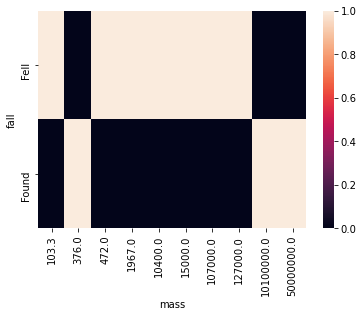

In [75]:
#Heatmap of Crosstabulation between 'mass' and 'fall'
sns.heatmap(fall_mass)

In [76]:
#Crosstabulation between 'mass' and 'nametype'
pd.crosstab(data['nametype'].head(10),data['mass'].head(10))

mass,103.3,376.0,472.0,1967.0,10400.0,15000.0,107000.0,127000.0,10100000.0,50000000.0
nametype,,,,,,,,,,
Valid,1,1,1,1,1,1,1,1,1,1


In [77]:
#Crosstabulation between 'fall' and 'year'
fall_year = pd.crosstab(data['fall'].head(10),data['year'].head(10))
fall_year

year,601,860,1399,1490,1491,1575,1583,1600,1621,1623
fall,,,,,,,,,,
Fell,0,1,1,1,1,0,1,0,1,1
Found,1,0,0,0,0,1,0,1,0,0


<AxesSubplot:xlabel='year', ylabel='fall'>

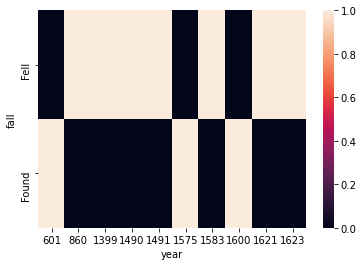

In [78]:
#Heatmap of Crosstabulation between 'fall' and 'year'
sns.heatmap(fall_year)

In [79]:
#Crosstabulation between 'nametype' and 'year'
pd.crosstab(data['nametype'].head(10),data['year'].head(10))

year,601,860,1399,1490,1491,1575,1583,1600,1621,1623
nametype,,,,,,,,,,
Valid,1,1,1,1,1,1,1,1,1,1


**Plotting**

In [80]:
#Preprocessing of Mass
mass = data['mass']
mass = np.array(mass)
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
data['scaled_mass'] = minmax_scale.fit_transform(mass.reshape(len(mass),1))

In [81]:
data['scaled_mass']

0        6.266500e-06
1        7.866500e-06
2        1.783333e-03
3        1.721500e-06
4        2.116667e-03
             ...     
31907    8.348333e-07
31908    2.166500e-06
31909    1.848333e-07
31910    1.313983e-05
31911    1.666667e-03
Name: scaled_mass, Length: 31912, dtype: float64

**Plotting Graph of Mass Vs Year and Scaled Mass Vs Year**

<ipython-input-82-98e5688a1135>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  labels = ax[0].set_xticklabels(data.loc[:100,'year'],rotation=0)


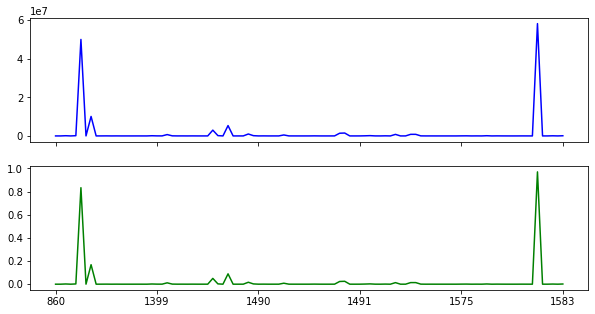

In [82]:
%matplotlib inline
fig, ax = plt.subplots(2,1, sharex=True,figsize=(10,5))
ax[0].plot(data.loc[:100,'mass'],'b')
ax[1].plot(data.loc[:100,'scaled_mass'],'g')
labels = ax[0].set_xticklabels(data.loc[:100,'year'],rotation=0)

**Plotting Histogram for frequency of Meteorite Landings (in centuries)**

Text(0.5, 1.0, 'Plot showing most of the Meteorite landings (fell or found) has been in recent centuries')

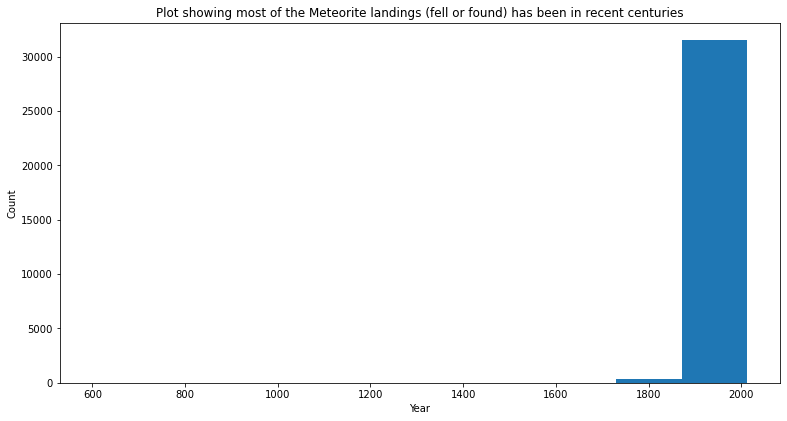

In [83]:

%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.hist(data['year'])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Plot showing most of the Meteorite landings (fell or found) has been in recent centuries')

**Plotting Meteorite Landings fell and found**

Text(0.5, 1.0, 'Plot showing most of the Meteorite landings (found) has been in recent centuries')

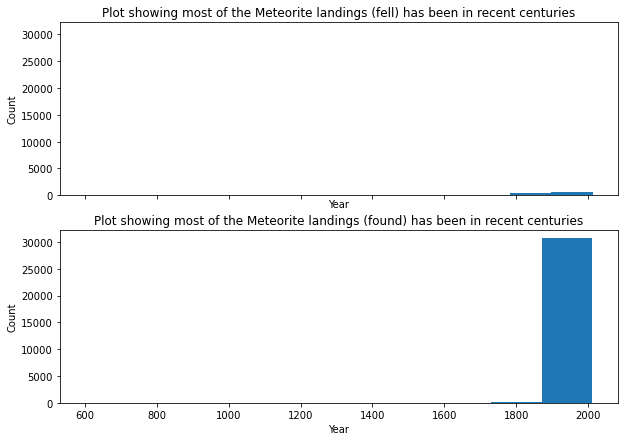

In [84]:

%matplotlib inline
fig, ax = plt.subplots(2,1, sharex=True,sharey=True,figsize=(10,7))
ax[0].hist(data['year'][data['fall']=='Fell'])
ax[1].hist(data['year'][data['fall']=='Found'])
for i in range(2):
  ax[i].set_xlabel('Year')
  ax[i].set_ylabel('Count')
ax[0].set_title('Plot showing most of the Meteorite landings (fell) has been in recent centuries')
ax[1].set_title('Plot showing most of the Meteorite landings (found) has been in recent centuries')

**Relation between Year and Mass in 21st century**

<AxesSubplot:xlabel='year', ylabel='mass'>

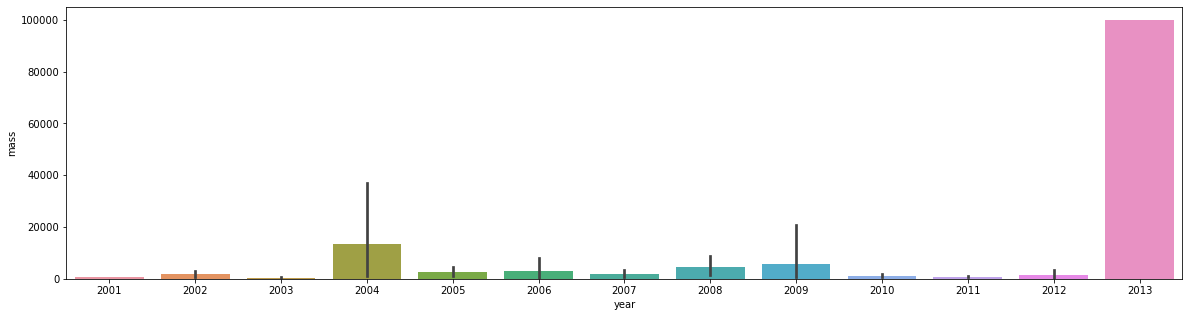

In [85]:
twenty = data[data['year']>2000]
fig = plt.figure(figsize=(20,5))
sns.barplot(x= twenty['year'].head(20000),y=twenty['mass'].head(20000))

**Plotting Histogram for frequency of Meteorite Landings in 21st Century**

Text(0.5, 1.0, 'Plot showing most of the Meteorite landings (fell or found) has been in 21st century')

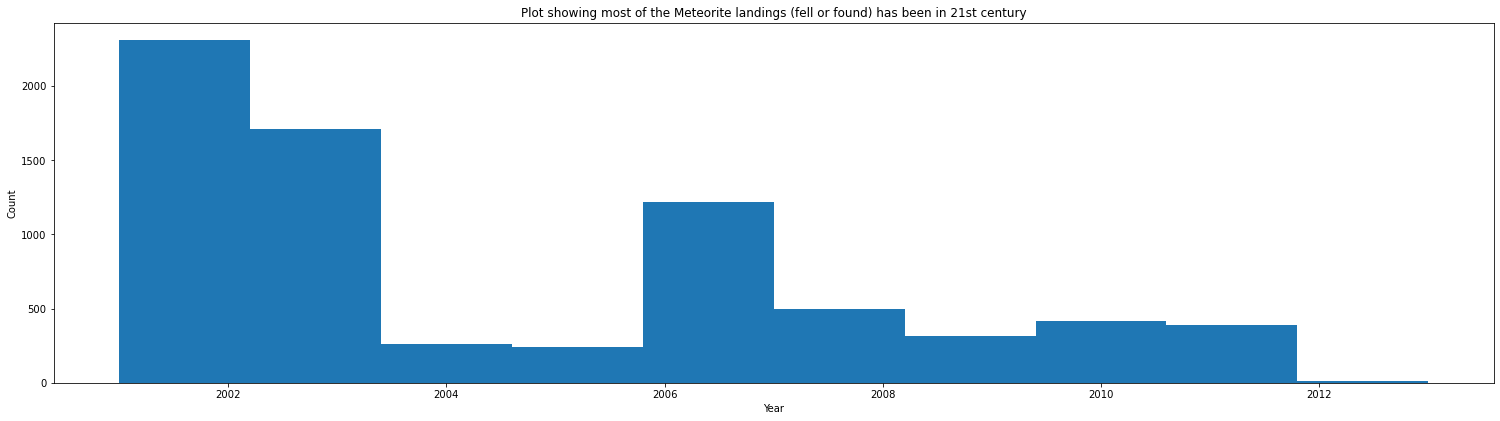

In [86]:
%matplotlib inline
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.hist(twenty['year'])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Plot showing most of the Meteorite landings (fell or found) has been in 21st century')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

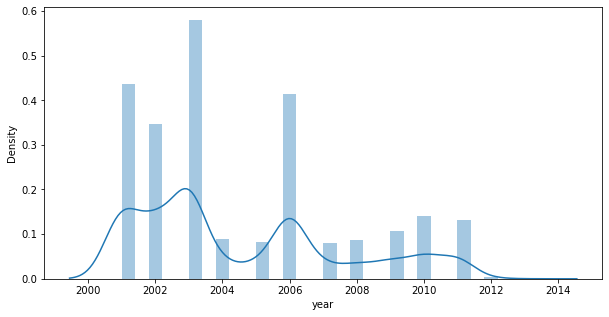

In [87]:
fig = plt.figure(figsize=(10,5))
sns.distplot(twenty['year'])

**Using folium to generate the map where meteorites fell** 

In [88]:
import folium
folium.Map()

In [89]:
data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,scaled_mass
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)",0.000006
1,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)",0.000008
2,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)",0.001783
3,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.483330, 9.516670)",0.000002
4,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.866670, 7.350000)",0.002117


**Adding the locations to the map**

In [90]:
gel = data.iloc[:100,:]
met = folium.Map()
metf = folium.map.FeatureGroup()

In [91]:
for lat,lng in zip(gel.reclat,gel.reclong):
  metf.add_child(folium.features.Marker([lat,lng]))

In [92]:
met.add_child(metf)

The above map shows us the total no. of meteorites fell in the 21st century.